In [1]:
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


In [2]:
turnon_param = general_parameters.CombinedParameter(parameters=[TG, LB, RB])
TGAC_DF_DS = general_parameters.CombinedParameter(parameters=[TGAC, DF, DS])
LB_RB = general_parameters.CombinedParameter(parameters=[LB, RB])

In [3]:
qc.show_subprocess_widget()

# Single measurements

In [ ]:
# Determine empty, load, read fidelities
ELR_parameter.setup(samples=400)
%time fidelities = ELR_parameter()
pulsemaster.stop()
print('Empty: {:.2f}, Load: {:.2f}, Read: {:.2f}'.format(*fidelities))

In [ ]:
T1_parameter.setup(samples=1000)
T1_parameter(5)
%time up_proportion, = T1_parameter()
print('Up proportion: {:.2f}'.format(up_proportion))

T1_parameter.setup(samples=200)
T1_parameter(3000)
%time up_proportion, = T1_parameter()
print('Up proportion: {:.2f}'.format(up_proportion))

pulsemaster.stop()

DF(0)
DS(0)
LB(0)
RB(0)
SRC(0)
TG(0)
TGAC(0)


DF(2.57)
DS(2.57)
LB(3.8)
RB(3.8)
SRC(0.25)
TG(15.564)
TGAC(1.842)


# DC sweep

### Turnon

In [403]:
for k in np.linspace(1.5,0,6):
    turnon_param(k)

In [4]:
turnon_vals = list(np.linspace(0, 1.6, 200))

In [17]:
DC_parameter.setup()
# data = qc.Loop(turnon_param[turnon_vals]
data = qc.Loop(dummy_param[0:1000:1], delay=1
               ).each(DC_parameter
                      ).then(qc.Task(pulsemaster.stop)
                             ).run(name='turnon',
                                   progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-12/#003_turnon_13-31-20'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy_set  | dummy        | (1000,)
   Measured | DC_voltage | DC_voltage   | (1000,)
started at 2016-10-12 13:31:21


<IPython.core.display.Javascript object>


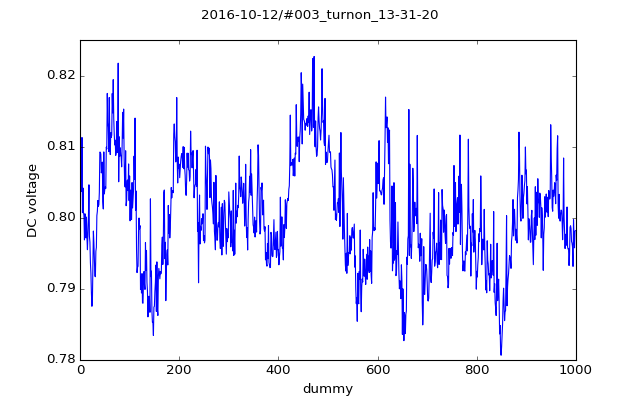

In [18]:
plot = qc.MatPlot()
plot.add(data.DC_voltage)

### Pinchoff

In [6]:
turnon_voltage = 1.9
pinchoff_vals = list(np.linspace(turnon_voltage, 0, 200))
gate = RB

turnon_param(turnon_voltage)
DC_parameter.setup()
data = qc.Loop(gate[pinchoff_vals]
               ).each(DC_parameter
                      ).then(qc.Task(pulsemaster.stop)
                             ).run(name='Pinchoff_{}'.format(gate.name),
                                   progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-12/#013_Pinchoff_RB_15-51-46'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-12 15:51:47


<IPython.core.display.Javascript object>


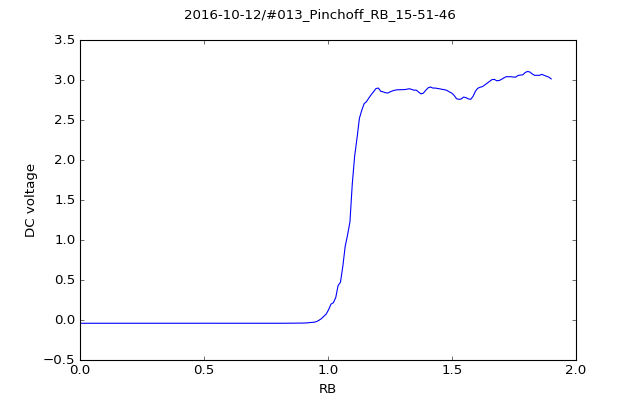

In [7]:
plot = qc.MatPlot()
plot.add(data.DC_voltage)

### 2D DC scans

DF_raw(2.57)
DS_raw(2.57)
LB_raw(3.8)
RB_raw(3.8)
SRC_raw(0.25
TG_raw(15.564)
TGAC_raw(1.842)


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-13/#018_DF_DS_scan_10-37-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-13 10:37:39


<IPython.core.display.Javascript object>


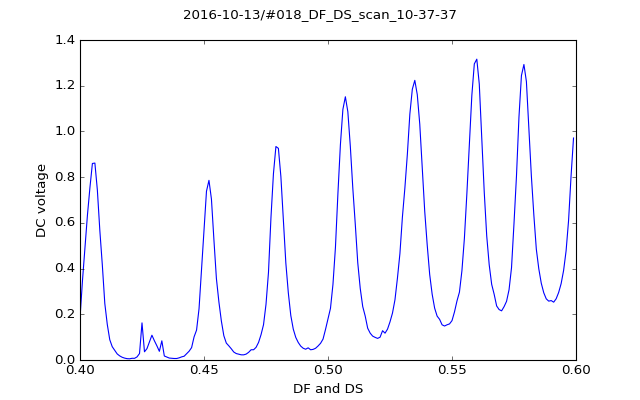

In [19]:
TGAC(0.5)
DC_parameter.setup()
data = qc.Loop(DF_DS[0.4:0.6:0.001]).each(DC_parameter).then(qc.Task(pulsemaster.stop)).run(name='DF_DS_scan')

plot = qc.MatPlot()
plot.add(data.DC_voltage)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-13/#017_DF_DS_scan_10-36-41'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (200,)
   Measured | DC_voltage | DC_voltage   | (200,)
started at 2016-10-13 10:36:42


<IPython.core.display.Javascript object>


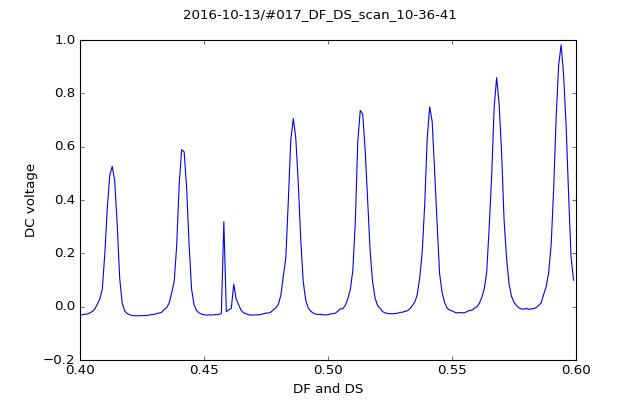

In [16]:
TGAC(0.5)
DC_parameter.setup()
data = qc.Loop(DF_DS[0.4:0.6:0.001]).each(DC_parameter).then(qc.Task(pulsemaster.stop)).run(name='DF_DS_scan')

plot = qc.MatPlot()
plot.add(data.DC_voltage)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-20/#002_DC_TGAC_vs_DF_DS_scan_08-32-00'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | TGAC_set   | TGAC         | (40,)
   Setpoint | DF_DS_set  | DF_DS        | (40, 40)
   Measured | TG         | TG           | (40, 40)
   Measured | DC_voltage | DC_voltage   | (40, 40)
started at 2016-10-20 08:32:02


<IPython.core.display.Javascript object>


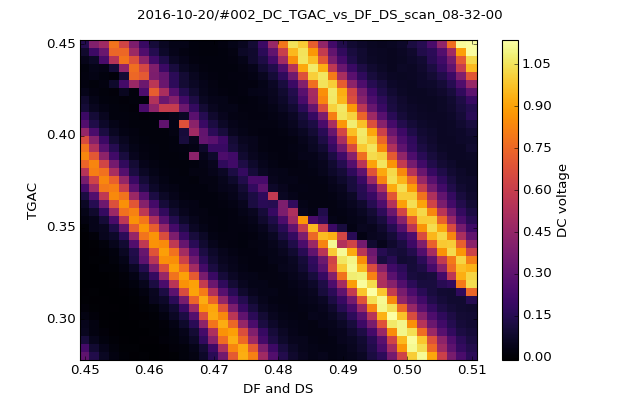

In [20]:
gate1 = TGAC
gate2 = DF_DS

# gate1_vals = list(np.linspace(0.3,0.7, 30))
# gate2_vals = list(np.linspace(0.4, 0.7, 80))
# gate1_vals = list(np.linspace(0.3,0.55, 50))
# gate2_vals = list(np.linspace(0.41, 0.53, 70))
gate1_vals = list(np.linspace(0.28,0.45, 40))
gate2_vals = list(np.linspace(0.45, 0.51, 40))

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).loop(gate2[gate2_vals]
                    ).each(TG,DC_parameter
                          ).then(qc.Task(pulsemaster.stop)
                                ).run(name='DC_{}_vs_{}_scan'.format(gate1.name, gate2.name),
                                      progress_interval=True)

plot = qc.MatPlot()
plot.add(data.DC_voltage)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-13/#003_DC_DF_DS_vs_TGAC_scan_LBRB_1_TG_1p8_08-26-43'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_DS_set  | DF_DS        | (80,)
   Setpoint | TGAC_set   | TGAC         | (80, 70)
   Measured | TG         | TG           | (80, 70)
   Measured | DC_voltage | DC_voltage   | (80, 70)
started at 2016-10-13 08:26:44


<IPython.core.display.Javascript object>


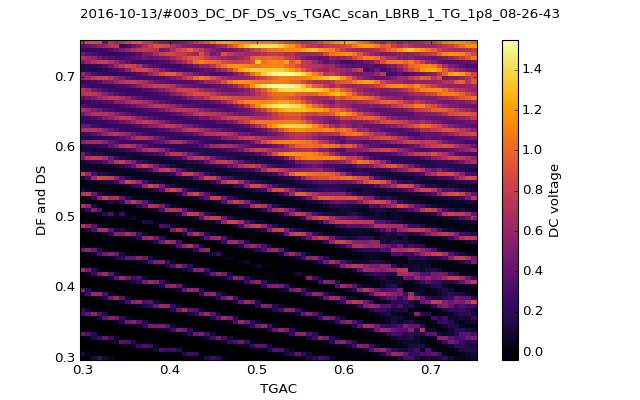

In [9]:
# Batch scan
LB_RB_val=1
TG_val=1.80

gate1 = DF_DS
gate2 = TGAC

gate1_vals = list(np.linspace(0.3,0.75, 80))
gate2_vals = list(np.linspace(0.3, 0.75, 70))

name = 'DC_{}_vs_{}_scan_LBRB_{}_TG_{}'.format(gate1.name, gate2.name, LB_RB_val, TG_val).replace('.', 'p')
LB_RB(LB_RB_val)
TG(TG_val)

DC_parameter.setup()
data = qc.Loop(gate1[gate1_vals]
              ).loop(gate2[gate2_vals]
                    ).each(TG,DC_parameter
                          ).then(qc.Task(pulsemaster.stop)
                                ).run(name=name,
                                      progress_interval=True)
plot = qc.MatPlot()
plot.add(data.DC_voltage)

# ELRLR sequence

In [44]:
ELRLR_parameter.stages['read']['duration'] = 40

In [16]:
TGAC_vals = list(np.linspace(0.29,0.325,35))
DF_DS_vals = list(np.linspace(0.49, 0.507,35))

In [17]:
ELRLR_parameter.setup(samples=250)
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(ELRLR_parameter
                          ).run(name='ELRLR_calibration',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-19/#003_ELRLR_calibration_20-47-08'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | TGAC_set       | TGAC           | (35,)
   Setpoint | DF_DS_set      | DF_DS          | (35, 35)
   Measured | fidelity_empty | fidelity_empty | (35, 35)
   Measured | fidelity_load  | fidelity_load  | (35, 35)
   Measured | fidelity_read  | fidelity_read  | (35, 35)
   Measured | up_proportion  | up_proportion  | (35, 35)
   Measured | dark_counts    | dark_counts    | (35, 35)
   Measured | contrast       | contrast       | (35, 35)
started at 2016-10-19 20:47:10


plotQ = qc.QtPlot()
plotQ.add(data.contrast)
plotQ = qc.QtPlot()
plotQ.add(data.dark_counts)
plotQ = qc.QtPlot()
plotQ.add(data.fidelity_load)
plotQ = qc.QtPlot()
plotQ.add(data.fidelity_empty)

In [35]:
pulsemaster.stop()

In [38]:
pulsemaster.start()

In [36]:
ELRLR_parameter.stages['read']['duration'] = 80

In [37]:
ELRLR_parameter.setup()

In [28]:
DC_parameter.setup()

<IPython.core.display.Javascript object>


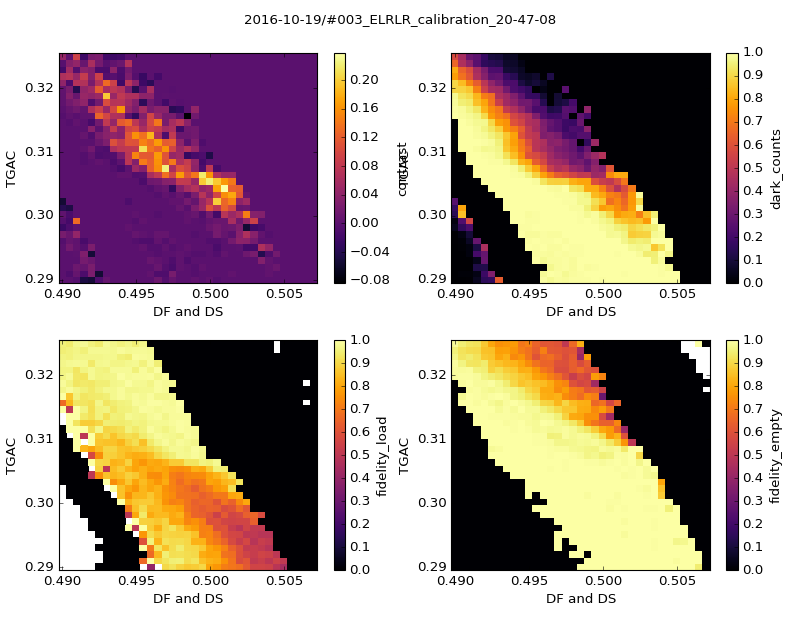

In [18]:
plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [26]:
DF_raw()

2.04

In [13]:
DF_DS(0.501)
TGAC(0.304)

In [ ]:
SRC(0.3)

In [5]:
ELRLR_parameter.setup(samples=400, print=True)
ELRLR_parameter();

RuntimeError: *** error on PulseMaster_server ***
while executing query: ('ASK', 'cmd', (0, 'get', 'acquisition'), {})

(<bound method InstrumentServer.handle_cmd of <qcodes.instrument.server.InstrumentServer object at 0x000000000147A278>>, (0, 'get', 'acquisition'), {})
Traceback (most recent call last):
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 347, in _process_ask
    response = func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\server.py", line 189, in handle_cmd
    return func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\base.py", line 560, in get
    return self.parameters[param_name].get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 567, in get
    raise e
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 561, in get
    value = self._get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\utils\command.py", line 176, in __call__
    return self.exec_function(*args)
  File "C:\Users\lab.BluG12Meas\Documents\SilQ\silq\meta_instruments\pulsemaster\PulseMaster.py", line 214, in do_acquisition
    self.bare_acquisition()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 263, in __call__
    return self.get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 567, in get
    raise e
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 561, in get
    value = self._get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\utils\command.py", line 176, in __call__
    return self.exec_function(*args)
  File "C:\Users\lab.BluG12Meas\Documents\SilQ\silq\meta_instruments\pulsemaster\PulseMaster.py", line 219, in do_bare_acquisition
    self.traces = self.ATS_controller.acquisition()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\remote.py", line 396, in __call__
    return self.get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\remote.py", line 407, in get
    return self._instrument._ask_server('get', self.name)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\remote.py", line 130, in _ask_server
    return self._manager.ask('cmd', self._id, func_name, *args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 128, in ask
    value = self._get_response(timeout=timeout, query=query)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 149, in _get_response
    self._handle_error(code, value, query)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 168, in _handle_error
    raise err_type(error_head + '\n\n' + error_str)
RuntimeError: ('*** error on Alazar_server ***\nwhile executing query: (\'ASK\', \'cmd\', (1, \'get\', \'acquisition\'), {})\n\n(<bound method InstrumentServer.handle_cmd of <qcodes.instrument.server.InstrumentServer object at 0x000000000144A630>>, (1, \'get\', \'acquisition\'), {})\nTraceback (most recent call last):\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\process\\server.py", line 347, in _process_ask\n    response = func(*args, **kwargs)\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument\\server.py", line 189, in handle_cmd\n    return func(*args, **kwargs)\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument\\base.py", line 560, in get\n    return self.parameters[param_name].get()\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument\\parameter.py", line 567, in get\n    raise e\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument\\parameter.py", line 561, in get\n    value = self._get()\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\utils\\command.py", line 176, in __call__\n    return self.exec_function(*args)\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument_drivers\\AlazarTech\\ATS_acquisition_controllers.py", line 103, in do_acquisition\n    **self.acquisitionkwargs)\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument_drivers\\AlazarTech\\ATS.py", line 488, in acquire\n    self._call_dll(\'AlazarAbortAsyncRead\', self._handle)\n  File "c:\\users\\lab.blug12meas\\documents\\silq\\qcodes\\qcodes\\instrument_drivers\\AlazarTech\\ATS.py", line 698, in _call_dll\n    argrepr))\nRuntimeError: (\'error 579: ApiWaitTimeout: operation did not finish during timeout interval. Check your trigger. from function AlazarAbortAsyncRead with args: [372]\', \'getting ATS_controller:acquisition\')\n', 'getting PulseMaster:bare_acquisition', 'getting PulseMaster:acquisition')


# Read level sweep

In [10]:
variable_read_parameter.setup(samples=100)
data = qc.Loop(variable_read_parameter[-1.5:2.5:0.04]
                     ).each(variable_read_parameter
                           ).run(name='variable_read',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-18/#002_variable_read_14-11-31'
   <Type>   | <array_id>                | <array.name>          | <array.shape>
   Setpoint | variable_read_voltage_set | variable_read_voltage | (100,)
   Measured | index0                    | index0                | (100, 8992)
   Measured | Channel_A_signal          | Channel_A_signal      | (100, 8992)
   Measured | Channel_C_signal          | Channel_C_signal      | (100, 8992)
started at 2016-10-18 14:11:47


In [42]:
plotQ = qc.QtPlot()
plotQ.add(data.Channel_A_signal)

plotQ = qc.QtPlot()
plotQ.add(data.Channel_C_signal)

# T1 measurement

In [11]:
# Prepare measurements: Determine threshold voltage
ELR_parameter.setup(samples=300, return_traces=True)
_, _, _, _, _,traces, traces_AWG = ELR_parameter()
_, _, threshold_voltage = analysis.find_high_low(traces)
assert threshold_voltage is not None, "Couldn't find accurate threshold"
print('Threshold voltage found at {:.2f} V'.format(threshold_voltage))

Threshold voltage found at 0.32 V


In [12]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(1,4.2,num=20,base=10))
np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [150.98971606184202, 4951.500669473131, 2279.789435643565, 14.737406155824797, 102.45338593872233, 10754.220761125622, 21.719114020174249, 1049.6696290308787, 7297.2276446863925, 222.51967709560262, 10.0, 483.29302385717523, 712.24855848599145, 1546.9407652462003, 32.008340465997662, 327.93628590208834, 15848.931924611141, 3359.8182862837812, 69.519279617756055, 47.171991382132958]


In [4]:
# Single point T1 sweep
T1_parameter.setup(threshold_voltage=threshold_voltage, samples=30, data_manager=data_manager_raw)
T1_parameter(30000)
data = qc.Loop(dummy_param[0:30:1]
              ).each(T1_parameter
                    ).run(name='T1_data_high', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-21/#001_T1_data_high_08-47-35'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | dummy_set         | dummy             | (30,)
   Measured | up_proportion     | up_proportion     | (30,)
   Measured | num_traces_loaded | num_traces_loaded | (30,)
started at 2016-09-21 08:47:37


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-20/#039_T1_single_sweep_16-46-59'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | T1_wait_time_set  | T1_wait_time      | (20,)
   Measured | up_proportion     | up_proportion     | (20,)
   Measured | num_traces_loaded | num_traces_loaded | (20,)
started at 2016-09-20 16:47:00


<IPython.core.display.Javascript object>


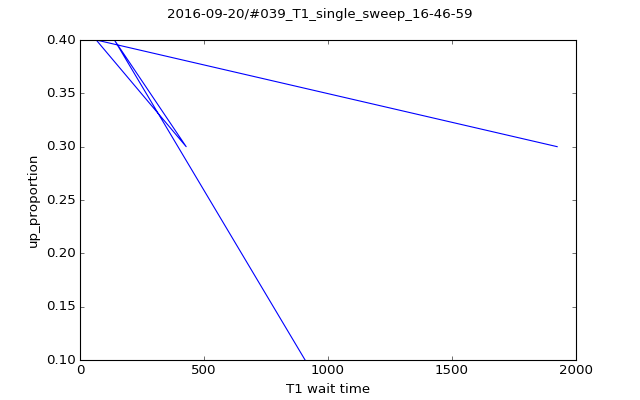

In [73]:
# Single T1 sweep
T1_parameter.setup(threshold_voltage=threshold_voltage, samples=10)

data = qc.Loop(T1_parameter[T1_wait_times]
                     ).each(T1_parameter
                           ).run(name='T1_single_sweep')

plotQ = qc.MatPlot()
plotQ.add(data.up_proportion)

In [13]:
# Continuous T1 sweep
setup_ELRLR = partial(ELRLR_parameter.setup, samples=400, data_manager=data_manager_raw)
setup_T1 = partial(T1_parameter.setup, threshold_voltage=threshold_voltage, samples=150, data_manager=data_manager_raw)
setup_ELRLR()
setup_T1()
data = qc.Loop(dummy_param[0:30:1]
              ).each(qc.Task(setup_ELRLR),
                     ELRLR_parameter,
                     qc.Task(setup_T1),
                     qc.Loop(T1_parameter[T1_wait_times]).each(T1_parameter)
                    ).run(name='T1_data', progress_interval=True)

# plotQ = qc.QtPlot()
# plotQ.add(data.up_proportion)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-10-18/#003_T1_data_14-22-14'
   <Type>   | <array_id>          | <array.name>      | <array.shape>
   Setpoint | dummy_set           | dummy             | (30,)
   Measured | fidelity_empty      | fidelity_empty    | (30,)
   Measured | fidelity_load       | fidelity_load     | (30,)
   Measured | fidelity_read       | fidelity_read     | (30,)
   Measured | up_proportion_1_3   | up_proportion     | (30,)
   Measured | dark_counts         | dark_counts       | (30,)
   Measured | contrast            | contrast          | (30,)
   Setpoint | T1_wait_time_set    | T1_wait_time      | (30, 20)
   Measured | up_proportion_3_0_0 | up_proportion     | (30, 20)
   Measured | num_traces_loaded   | num_traces_loaded | (30, 20)
started at 2016-10-18 14:22:16


In [17]:
data.sync()
print(data.T1_wait_time_set[0])
data.up_proportion_3_0_0[11]

[  1.50989716e+02   4.95150067e+03   2.27978944e+03   1.47374062e+01
   1.02453386e+02   1.07542208e+04   2.17191140e+01   1.04966963e+03
   7.29722764e+03   2.22519677e+02   1.00000000e+01   4.83293024e+02
   7.12248558e+02   1.54694077e+03   3.20083405e+01   3.27936286e+02
   1.58489319e+04   3.35981829e+03   6.95192796e+01   4.71719914e+01]


array([ 0.58389262,  0.26      ,  0.32666667,  0.63448276,  0.54421769,
        0.20666667,  0.55033557,  0.47333333,  0.21333333,  0.56081081,
        0.51006711,  0.53691275,  0.44966443,  0.36241611,  0.58      ,
        0.55704698,  0.18      ,  0.28666667,  0.54      ,  0.60666667])